In [1]:
# import necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing

import seaborn as sns # visualization

import requests # run API requests

import config # contains private API key

## Accessing Yelp with an API

#### Retrieving data on 200 restaurants in Cape Coral, Florida

In [2]:
headers = config.headers

In [3]:
offset = 0
df = pd.DataFrame()

for i in range (0,4):

    offset = 51*i

    headers = headers

    params = {
    'location': 'Cape Coral',
    'limit': 50,
    'offset': offset
    }

    business_url = config.business_endpoint
    r_business = requests.get(business_url, headers=headers, params=params)
    json = r_business.json()
    df_retreived = pd.DataFrame(json['businesses'])

    df = pd.concat([df, df_retreived])

In [4]:
df.duplicated(subset=["id"]).sum()

0

In [5]:
print(f"We have retrieved data on {df.shape[0]} restaurants.")
df.head(5)

We have retrieved data on 200 restaurants.


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,HlCoy0bDQbnWNyey_KJ2aQ,masala-mantra-the-indian-bistro-cape-coral,Masala Mantra - The Indian Bistro,https://s3-media4.fl.yelpcdn.com/bphoto/Xz4b59...,False,https://www.yelp.com/biz/masala-mantra-the-ind...,312,"[{'alias': 'indpak', 'title': 'Indian'}]",5.0,"{'latitude': 26.56804, 'longitude': -81.94428}","[pickup, delivery]",$$,"{'address1': '4518 Del Prado Blvd', 'address2'...",+12395406300,(239) 540-6300,5280.082786
1,ZJrkzV5Gjti75MoZ_KTB4w,fish-tale-grill-by-merrick-seafood-cape-coral-2,Fish Tale Grill by Merrick Seafood,https://s3-media1.fl.yelpcdn.com/bphoto/aj1fXs...,False,https://www.yelp.com/biz/fish-tale-grill-by-me...,685,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,"{'latitude': 26.56398838089358, 'longitude': -...",[delivery],$$$,"{'address1': '1229 SE 47th Ter', 'address2': '...",+12392573167,(239) 257-3167,5552.651668
2,sNPQETIQ88aNTwIyvymNLw,10-twenty-five-cape-coral,10 Twenty Five,https://s3-media3.fl.yelpcdn.com/bphoto/9A88Pg...,False,https://www.yelp.com/biz/10-twenty-five-cape-c...,407,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 26.6318, 'longitude': -81.97321}",[delivery],$$,"{'address1': '1025 Santa Barbara Blvd', 'addre...",+12398290407,(239) 829-0407,2393.136391
3,WIgR1oNiTgOiZq3YAd7OYA,cafè-you-cape-coral,Cafè YOU,https://s3-media1.fl.yelpcdn.com/bphoto/W6jpFW...,False,https://www.yelp.com/biz/caf%C3%A8-you-cape-co...,247,"[{'alias': 'gluten_free', 'title': 'Gluten-Fre...",4.5,"{'latitude': 26.634242, 'longitude': -81.94314}",[delivery],$,"{'address1': '1423 SE 10th St', 'address2': 'U...",+12396000966,(239) 600-0966,3299.004190
4,63KRuBDeIG5TkXqv9u8-Wg,twisted-lobster-cape-coral-5,Twisted Lobster,https://s3-media4.fl.yelpcdn.com/bphoto/NlG92F...,False,https://www.yelp.com/biz/twisted-lobster-cape-...,547,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.5,"{'latitude': 26.626746529285345, 'longitude': ...","[pickup, delivery]",$$,"{'address1': '1341 Del Prado Blvd S', 'address...",+12398002879,(239) 800-2879,2949.147081


#### Retrieving 3 reviews per restaurant in df

In [6]:
df_reviews = pd.DataFrame()

for i in range (0,199):

    headers = headers

    business_id = df["id"].iloc[i]
    business_url = "https://api.yelp.com/v3/businesses/" + business_id + "/reviews"

    r_business = requests.get(business_url, headers=headers)
    json = r_business.json()
    df_retreived = pd.DataFrame(json['reviews'])

    df_reviews = pd.concat([df_reviews, df_retreived])

In [7]:
print(f"We have retrieved {df_reviews.shape[0]} reviews for our 200 restaurants.")
df_reviews.head(5)

We have retrieved 597 reviews for our 200 restaurants.


,id,url,text,rating,time_created,user
0,VNG-cm3VXbTR6dKs8sGkNw,https://www.yelp.com/biz/masala-mantra-the-ind...,Very authentic and delicious Indian food. Staf...,5,2022-08-15 18:15:15,"{'id': 'qXKA73uEtcna7wTjhUiDlg', 'profile_url'..."
1,d6HtGiWtCzGj2zdsU6T0gg,https://www.yelp.com/biz/masala-mantra-the-ind...,This is my 3rd visit to Masala Mantra and I ha...,5,2022-07-26 15:12:05,"{'id': 'aJc9aNkwWuZq5RBdt8RuSQ', 'profile_url'..."
2,flMmNpqgGzPvVJeNZlTkDw,https://www.yelp.com/biz/masala-mantra-the-ind...,Amazing Indian food. The quality with incredib...,5,2022-09-24 18:47:56,"{'id': 'si0DOjWcRLOLl_VD6rWuSA', 'profile_url'..."
0,07e9cGj8qHWuvfocOCGDhA,https://www.yelp.com/biz/fish-tale-grill-by-me...,Great Brunch today! 9/11/22 I just had a Filet...,5,2022-09-11 08:41:32,"{'id': 'NFeTfoQy2nAzJaSe8PutAg', 'profile_url'..."
1,EQGg16VvVBRBICNC3ZuoaQ,https://www.yelp.com/biz/fish-tale-grill-by-me...,"A Cape Coral MUST GO!\n\nKids love it, grandpa...",5,2022-08-26 12:32:21,"{'id': 'dtyJ2p7hW5zM0EEI744Zkg', 'profile_url'..."


In [8]:
df_reviews.to_csv('reviews.csv', index=False)

In [9]:
# keep only the "text" and "rating" column

df_reviews = df_reviews[['text', 'rating']]

Text(0.5, 1.0, 'Distribution of client ratings 1 to 5')

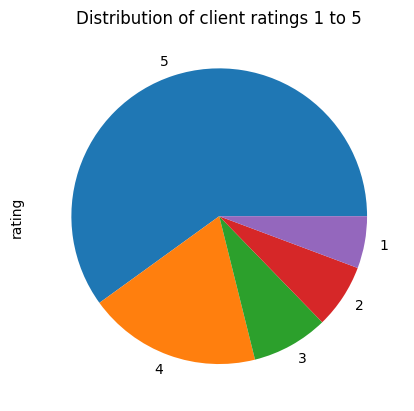

In [10]:
chart = df_reviews.rating.value_counts().plot(kind="pie")
chart.set_title("Distribution of client ratings 1 to 5")

In [11]:
# Since we are interested in analyzing only the negative reviews,
# we will keep only the reviews with a rating of 1 or 2

df_bad_reviews = df_reviews[df_reviews['rating'] < 2]

In [12]:
print(f"After applying the filter we are left with {df_bad_reviews.shape[0]} bad reviews.")
df_bad_reviews.head(5)

After applying the filter we are left with 34 bad reviews.


,text,rating
2,I don't understand the high ratings. \nOur ser...,1
1,Came in for a family dinner while visiting Cap...,1
1,*UPDATE* I received a response to my original ...,1
2,We have been customers for many years. We have...,1
1,"My husband was eating a manicotti meal, and as...",1


In [13]:
df_bad_reviews.to_csv('Ponomarjova_Katrin_1_csv_092022.csv', index=False)

### Conclusion 

We can see that out of 597 reviews, we can only obtain 34 negative reviews (numbers may change when running this code again but the proportion should stay similar). This is due to the fact that the Yelp API only allows us to retreive 3 reviews from each restaurant, and the chances of that review being negative are low. We then need to run our "business retreival" loop many times in order to retreive enough business IDs, only then to run another loop, the "review retrieval" loop, to only retreive 3 reviews per business. 

In order to properly analyze the negative reviews and model the topics of dissatisfaction, we need thousands or even tens of thousands of negative reviews. In conclusion, it is probably less time consuming and more computationally simple to download the entire dataset from Yelp and filter it for negative reviews.